In [1]:
from math import erf, sqrt, inf

import os
import datetime
import numpy as np
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import math

import statsmodels.api as sm
import scipy

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
import joblib
import yaml

In [2]:
teams_to_analyze=['Australia','Sri Lanka','India','Bangladesh','New Zealand','South Africa','West Indies','Afghanistan','Pakistan','England','Ireland','Zimbabwe','Scotland']

In [4]:

# allMatchesBallByBall


filenames=os.listdir('../iccT20I')
ourDataList=[]
fileCount=0
for f in filenames: 
    if f[-5:] == '.yaml':
        filedataofThismatch =yaml.safe_load(open('../iccT20I/'+f,'r'))
        if filedataofThismatch['info']['gender']=='female':
            continue
            
        this_match_teams=[val for val in filedataofThismatch['info']['teams'] if val in teams_to_analyze]
        print(this_match_teams)
        if len(this_match_teams)<2:
            continue
        addThisMatchInfo=True
        
        thisMatchInfo={}
        thisMatchInfo['matchId']=f
        thisMatchInfo['teams']=[]
        
        if isinstance(filedataofThismatch['info']['dates'][0],str):
            thisMatchDate=datetime.datetime.strptime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d')
        else:
            thisMatchDate=datetime.datetime.strptime(\
                                datetime.datetime.strftime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d'),\
                                '%Y-%m-%d')
        thisMatchInfo['matchDate']=thisMatchDate
        
        if filedataofThismatch['info']['outcome'].get('winner') is not None:
            thisMatchInfo['winner']=filedataofThismatch['info']['outcome']['winner']
        elif filedataofThismatch['info']['outcome'].get('eliminator') is not None:
            thisMatchInfo['winner']=filedataofThismatch['info']['outcome']['eliminator']
            
        
        thisMatchInfo['innings']=[]
        for i in range(len(filedataofThismatch['innings'])):
            if i>1:
                continue
            inng='1st innings' if i==0 else '2nd innings'
            
            thisMatchInfo['teams'].append(filedataofThismatch['innings'][i][inng]['team'])
            print(filedataofThismatch['innings'][i][inng]['team'])
            deliveryList=filedataofThismatch['innings'][i][inng]['deliveries']
            thisMatchInfo['innings'].append(deliveryList)
            wicketsremaining = 10
            for j in range(len(deliveryList)):
                ballscount = list(deliveryList[j].keys())[0]
                if 'wicket' in list(deliveryList[j][ballscount].keys()):
                    wicketsremaining=wicketsremaining-1
                    
            if i==0 and wicketsremaining>0 and int(str(list(thisMatchInfo['innings'][-1][-1].keys())[0]).split('.')[0])<18:
                addThisMatchInfo=False
        
        if addThisMatchInfo:
            print(filedataofThismatch['info']['gender'])
            ourDataList.append(thisMatchInfo)
            fileCount+=1
            print(fileCount)
            
        print(f)

def swapMatchData(a,b):
    temp=ourDataList[a]
    ourDataList[a]=ourDataList[b]
    ourDataList[b]=temp

for j in range(1,len(ourDataList)-1):
    for i in range(0,len(ourDataList)-j):
        if ourDataList[i]['matchDate']>ourDataList[i+1]['matchDate']:
            swapMatchData(i,i+1)

print(len(ourDataList))

with open('allMatchesBallByBalliccT20.pkl', 'wb') as file: 
    pickle.dump(ourDataList, file)

['Australia', 'Sri Lanka']
Australia
Sri Lanka
male
1
1001349.yaml
['Australia', 'Sri Lanka']
Australia
Sri Lanka
male
2
1001351.yaml
['Australia', 'Sri Lanka']
Australia
Sri Lanka
male
3
1001353.yaml
['Ireland']
['Zimbabwe', 'India']
Zimbabwe
India
male
4
1007655.yaml
['Zimbabwe', 'India']
Zimbabwe
India
male
5
1007657.yaml
['Zimbabwe', 'India']
India
Zimbabwe
male
6
1007659.yaml
['New Zealand', 'Bangladesh']
Bangladesh
New Zealand
male
7
1019979.yaml
['New Zealand', 'Bangladesh']
New Zealand
Bangladesh
male
8
1019981.yaml
['New Zealand', 'Bangladesh']
New Zealand
Bangladesh
male
9
1019983.yaml
['New Zealand', 'South Africa']
South Africa
New Zealand
male
10
1020029.yaml
['England', 'South Africa']
South Africa
England
male
11
1031431.yaml
['England', 'South Africa']
South Africa
England
male
12
1031433.yaml
['England', 'South Africa']
England
South Africa
male
13
1031435.yaml
['West Indies', 'England']
West Indies
England
male
14
1031665.yaml
['India', 'England']
India
England
male
1

['Afghanistan', 'Ireland']
Afghanistan
Ireland
male
114
1150144.yaml
['England', 'Pakistan']
Pakistan
England
male
115
1152840.yaml
['Bangladesh', 'West Indies']
Bangladesh
West Indies
male
116
1153317.yaml
['Bangladesh', 'West Indies']
Bangladesh
West Indies
male
117
1153318.yaml
['Bangladesh', 'West Indies']
West Indies
Bangladesh
male
118
1153319.yaml
['New Zealand', 'India']
New Zealand
India
male
119
1153696.yaml
['New Zealand', 'India']
New Zealand
India
male
120
1153697.yaml
['New Zealand', 'India']
New Zealand
India
male
121
1153698.yaml
['New Zealand', 'Sri Lanka']
New Zealand
Sri Lanka
male
122
1153843.yaml
['Pakistan', 'Australia']
Pakistan
Australia
male
123
1157372.yaml
['Pakistan', 'Australia']
Pakistan
Australia
male
124
1157373.yaml
['Pakistan', 'Australia']
Pakistan
Australia
male
125
1157374.yaml
['Pakistan', 'New Zealand']
Pakistan
New Zealand
male
126
1157375.yaml
['New Zealand', 'Pakistan']
New Zealand
Pakistan
male
127
1157376.yaml
['Pakistan', 'New Zealand']
Paki

['New Zealand', 'Pakistan']
New Zealand
Pakistan
male
216
1233961.yaml
['New Zealand', 'Australia']
New Zealand
Australia
male
217
1233971.yaml
['New Zealand', 'Australia']
New Zealand
Australia
male
218
1233972.yaml
['Australia', 'New Zealand']
Australia
New Zealand
male
219
1233973.yaml
['Australia', 'New Zealand']
Australia
New Zealand
male
220
1233974.yaml
['Australia', 'New Zealand']
Australia
New Zealand
male
221
1233975.yaml
['New Zealand', 'Bangladesh']
New Zealand
Bangladesh
male
222
1233979.yaml
['New Zealand', 'Bangladesh']
New Zealand
Bangladesh
1233980.yaml
['New Zealand', 'Bangladesh']
New Zealand
Bangladesh
1233981.yaml
[]
[]
[]
['South Africa', 'England']
South Africa
England
male
223
1237122.yaml
['South Africa', 'England']
South Africa
England
male
224
1237123.yaml
['South Africa', 'England']
South Africa
England
male
225
1237124.yaml
['Pakistan', 'South Africa']
Pakistan
South Africa
male
226
1243019.yaml
['Pakistan', 'South Africa']
Pakistan
South Africa
male
227
12

['New Zealand', 'India']
India
New Zealand
male
327
366622.yaml
['New Zealand', 'West Indies']
New Zealand
West Indies
male
328
366707.yaml
['New Zealand', 'West Indies']
New Zealand
West Indies
male
329
366708.yaml
['New Zealand', 'India']
India
New Zealand
male
330
386494.yaml
['Sri Lanka', 'India']
Sri Lanka
India
male
331
386535.yaml
['South Africa', 'England']
England
South Africa
male
332
387563.yaml
['South Africa', 'England']
South Africa
England
male
333
387564.yaml
['Australia', 'Pakistan']
Australia
Pakistan
male
334
392615.yaml
['West Indies', 'Bangladesh']
Bangladesh
West Indies
male
335
401076.yaml
['Sri Lanka', 'Pakistan']
Pakistan
Sri Lanka
male
336
403375.yaml
['Sri Lanka', 'New Zealand']
New Zealand
Sri Lanka
male
337
403385.yaml
['Sri Lanka', 'New Zealand']
New Zealand
Sri Lanka
male
338
403386.yaml
['Australia', 'West Indies']
Australia
West Indies
male
339
406197.yaml
['Australia', 'West Indies']
West Indies
Australia
male
340
406198.yaml
['Australia', 'Pakistan']


['Australia', 'South Africa']
South Africa
Australia
male
446
533290.yaml
['India', 'Pakistan']
Pakistan
India
male
447
533291.yaml
['New Zealand', 'West Indies']
West Indies
New Zealand
male
448
533292.yaml
['Sri Lanka', 'England']
Sri Lanka
England
male
449
533293.yaml
['Australia', 'Pakistan']
Pakistan
Australia
male
450
533294.yaml
['India', 'South Africa']
India
South Africa
male
451
533295.yaml
['Sri Lanka', 'Pakistan']
Sri Lanka
Pakistan
male
452
533296.yaml
['Australia', 'West Indies']
West Indies
Australia
male
453
533297.yaml
['Sri Lanka', 'West Indies']
West Indies
Sri Lanka
male
454
533298.yaml
['England', 'West Indies']
West Indies
England
male
455
534208.yaml
['England', 'South Africa']
England
South Africa
male
456
534233.yaml
['England', 'South Africa']
South Africa
England
534234.yaml
['England', 'South Africa']
England
South Africa
534235.yaml
['Bangladesh', 'Pakistan']
Pakistan
Bangladesh
male
457
538068.yaml
['West Indies', 'Australia']
West Indies
Australia
male
45

['Australia', 'Pakistan']
Pakistan
Australia
male
555
727917.yaml
['West Indies', 'New Zealand']
West Indies
New Zealand
730283.yaml
['West Indies', 'New Zealand']
West Indies
New Zealand
male
556
730285.yaml
['West Indies', 'Bangladesh']
Bangladesh
730293.yaml
['South Africa', 'West Indies']
South Africa
West Indies
male
557
736063.yaml
['New Zealand', 'Pakistan']
New Zealand
Pakistan
male
558
742617.yaml
['England', 'New Zealand']
England
New Zealand
male
559
743953.yaml
['England', 'Australia']
England
Australia
male
560
743975.yaml
['New Zealand', 'Pakistan']
New Zealand
Pakistan
male
561
754039.yaml
['Australia', 'South Africa']
Australia
South Africa
male
562
754717.yaml
['Australia', 'South Africa']
South Africa
Australia
male
563
754719.yaml
['Australia', 'South Africa']
South Africa
Australia
male
564
754721.yaml
['South Africa', 'England']
England
South Africa
male
565
800479.yaml
['South Africa', 'England']
England
South Africa
male
566
800481.yaml
[]
['Bangladesh', 'South A

In [5]:
with open('allMatchesBallByBalliccT20.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matchlist = unpickler.load() 
    file.close()

In [6]:

second_Inng_Data=[]

for match in matchlist:
    second_inng_info={}
    if 'winner' not in list(match.keys()):
        continue
    totalafterfirstinnings=0
    cum_total_second_innings=0
    second_inng_info['matchid']=match['matchId']
    second_inng_info['date']=match['matchDate']
    for i in match['innings'][0]:
        j = list(i.keys())[0]
        totalafterfirstinnings+=(i[j]['runs']['total'])
    target = (totalafterfirstinnings+1)
    second_inng_info['target']=target
    if match['teams'][1]==match['winner']:
        second_inng_info['win/loss']='win'
    else:
        second_inng_info['win/loss']='loss'
    second_inng_info['team']=match['teams'][1]
    ballIndex=120
    Wickets=0
    Boundaries=0
    second_inng_info['BallbyBall']={}
    
    for x in match['innings'][1]:
        
        
        for y in list(x.keys()):
            
            cum_total_second_innings+=x[y]['runs']['total']
            if 'wicket' in list(x[y].keys()):
                Wickets+=1
                
            if x[y]['runs']['batsman']>=4:
                Boundaries+=1
            validBall=True
            if 'extras' in list(x[y].keys()):
                if 'wides' in list(x[y]['extras'].keys()) or 'noballs' in list(x[y]['extras'].keys()):
                    validBall=False

            if validBall:
                ballIndex=ballIndex-1
                
                second_inng_info['BallbyBall'][ballIndex]={}
                second_inng_info['BallbyBall'][ballIndex]['inningstotal']=0
                second_inng_info['BallbyBall'][ballIndex]['wickets']=0
                second_inng_info['BallbyBall'][ballIndex]['boundaries']=0
                
                
                second_inng_info['BallbyBall'][ballIndex]['inningstotal']=cum_total_second_innings
                second_inng_info['BallbyBall'][ballIndex]['wickets']=Wickets
                second_inng_info['BallbyBall'][ballIndex]['boundaries']=Boundaries
    print(second_inng_info)        
    second_Inng_Data.append(second_inng_info)

{'matchid': '211048.yaml', 'date': datetime.datetime(2005, 2, 17, 0, 0), 'target': 215, 'win/loss': 'loss', 'team': 'New Zealand', 'BallbyBall': {119: {'inningstotal': 0, 'wickets': 0, 'boundaries': 0}, 118: {'inningstotal': 0, 'wickets': 0, 'boundaries': 0}, 117: {'inningstotal': 1, 'wickets': 0, 'boundaries': 0}, 116: {'inningstotal': 1, 'wickets': 0, 'boundaries': 0}, 115: {'inningstotal': 2, 'wickets': 0, 'boundaries': 0}, 114: {'inningstotal': 2, 'wickets': 0, 'boundaries': 0}, 113: {'inningstotal': 6, 'wickets': 0, 'boundaries': 1}, 112: {'inningstotal': 7, 'wickets': 0, 'boundaries': 1}, 111: {'inningstotal': 8, 'wickets': 0, 'boundaries': 1}, 110: {'inningstotal': 10, 'wickets': 0, 'boundaries': 1}, 109: {'inningstotal': 11, 'wickets': 0, 'boundaries': 1}, 108: {'inningstotal': 12, 'wickets': 0, 'boundaries': 1}, 107: {'inningstotal': 12, 'wickets': 0, 'boundaries': 1}, 106: {'inningstotal': 12, 'wickets': 0, 'boundaries': 1}, 105: {'inningstotal': 13, 'wickets': 0, 'boundaries

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'matchid': '1200426.yaml', 'date': datetime.datetime(2019, 9, 17, 0, 0), 'target': 194, 'win/loss': 'win', 'team': 'Ireland', 'BallbyBall': {119: {'inningstotal': 4, 'wickets': 0, 'boundaries': 1}, 118: {'inningstotal': 4, 'wickets': 0, 'boundaries': 1}, 117: {'inningstotal': 4, 'wickets': 0, 'boundaries': 1}, 116: {'inningstotal': 5, 'wickets': 0, 'boundaries': 1}, 115: {'inningstotal': 10, 'wickets': 0, 'boundaries': 1}, 114: {'inningstotal': 16, 'wickets': 0, 'boundaries': 2}, 113: {'inningstotal': 16, 'wickets': 0, 'boundaries': 2}, 112: {'inningstotal': 16, 'wickets': 0, 'boundaries': 2}, 111: {'inningstotal': 17, 'wickets': 0, 'boundaries': 2}, 110: {'inningstotal': 18, 'wickets': 0, 'boundaries': 2}, 109: {'inningstotal': 19, 'wickets': 0, 'boundaries': 2}, 108: {'inningstotal': 28, 'wickets': 0, 'boundaries': 3}, 107: {'inningstotal': 32, 'wickets': 0, 'boundaries': 4}, 106: {'inningstotal': 32, 'wickets': 0, 'boundaries': 4}, 105: {'inningstotal': 36, 'wickets': 0, 'boundarie

In [7]:
with open('secondInngdata_iccT20i.pkl', 'wb') as file: 
    pickle.dump(second_Inng_Data, file) 
    file.close()

In [9]:
allmatchesdata=[]
for i in filenames:
    if i[-5:]=='.yaml':
        filedataofThismatch =yaml.safe_load(open('../iccT20I/'+i,'r'))
        if filedataofThismatch['info']['gender']=='female':
            continue
        this_match_teams=[val for val in filedataofThismatch['info']['teams'] if val in teams_to_analyze]
#         print(this_match_teams)
        if len(this_match_teams)<2:
            continue
        filedataofThismatch['matchId']=i
        allmatchesdata.append(filedataofThismatch)

In [10]:
for match in allmatchesdata:
    if isinstance(match['info']['dates'][0],str):
                thisMatchDate=datetime.datetime.strptime(match['info']['dates'][0], '%Y-%m-%d')
    else:
        thisMatchDate=datetime.datetime.strptime(\
                            datetime.datetime.strftime(match['info']['dates'][0], '%Y-%m-%d'),\
                            '%Y-%m-%d')
    match['info']['dates'][0]=thisMatchDate

In [11]:
def swapMatchdata(a,b,L):
    temp=L[a]
    L[a]=L[b]
    L[b]=temp

for j in range(1,len(allmatchesdata)-1):
    for i in range(0,len(allmatchesdata)-j):        
        if allmatchesdata[i]['info']['dates'][0]>allmatchesdata[i+1]['info']['dates'][0]:
            swapMatchdata(i,i+1,allmatchesdata)

In [12]:
with open('data_Of_allMatches_iccT20.pkl', 'wb') as file: 
    pickle.dump(allmatchesdata, file)

In [13]:

ourDatalist=[]
fileCount=0
for i in filenames: 
    if i[-5:] == '.yaml':
        filedataofThismatch =yaml.safe_load(open('../iccT20I/'+i,'r'))
        fileCount+=1
        print(fileCount,i)
        if filedataofThismatch['info']['outcome'].get('winner') is not None:
            
            if isinstance(filedataofThismatch['info']['dates'][0],str):
                thisMatchDate=datetime.datetime.strptime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d')
            else:
                thisMatchDate=datetime.datetime.strptime(\
                                    datetime.datetime.strftime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d'),\
                                    '%Y-%m-%d')
#             if thisMatchDate.year>=2008 and thisMatchDate.year<=2012:
            ourdata ={}
            ballindex = 120
            totalrunscount = 0
            wicketsremaining = 10
            deliveryList=filedataofThismatch['innings'][0]['1st innings']['deliveries']
            for j in range(len(deliveryList)):
                ballscount = list(deliveryList[j].keys())[0]
                totalrunsperball=deliveryList[j][ballscount]['runs']['total']
                totalrunscount=totalrunscount+totalrunsperball
                if 'wicket' in list(deliveryList[j][ballscount].keys()):
                        wicketsremaining=wicketsremaining-1

                validBall=True
                if 'extras' in list(deliveryList[j][ballscount].keys()):
                    if 'wides' in (deliveryList[j][ballscount]['extras'].keys()) or \
                        'noballs' in (deliveryList[j][ballscount]['extras'].keys()):
                        validBall=False

                if validBall:    
                    ballindex = ballindex-1
                    ourdata[ballindex]={}
                    ourdata[ballindex]['totalrunscount']=totalrunscount
                    ourdata[ballindex]['wicketsremaining']=wicketsremaining

            if wicketsremaining==0 or (ballindex<5 and ballindex>0):
                for k in range(ballindex-1,-1,-1):
                    ourdata[k]={}
                    ourdata[k]['totalrunscount']=totalrunscount
                    ourdata[k]['wicketsremaining']=wicketsremaining

            listElement={}
            listElement['ourData']=ourdata
            listElement['matchDate']=thisMatchDate
            listElement['matchId']=i

            winnerofmatch=filedataofThismatch['info']['outcome']['winner']
            teambattingfirst=filedataofThismatch['innings'][0]['1st innings']['team']
            if winnerofmatch == teambattingfirst:
                listElement['winLoss']='win'
            else:
                listElement['winLoss']='loss'

            ourDatalist.append(listElement)
            print(len(ourDatalist),winnerofmatch)



1 1001349.yaml
1 Sri Lanka
2 1001351.yaml
2 Sri Lanka
3 1001353.yaml
3 Australia
4 1004729.yaml
4 Hong Kong
5 1007655.yaml
5 Zimbabwe
6 1007657.yaml
6 India
7 1007659.yaml
7 India
8 1019979.yaml
8 New Zealand
9 1019981.yaml
9 New Zealand
10 1019983.yaml
10 New Zealand
11 1020029.yaml
11 South Africa
12 1031431.yaml
12 England
13 1031433.yaml
13 South Africa
14 1031435.yaml
14 England
15 1031665.yaml
15 West Indies
16 1034825.yaml
16 England
17 1034827.yaml
17 India
18 1034829.yaml
18 India
19 1040485.yaml
19 Afghanistan
20 1040487.yaml
20 Afghanistan
21 1040489.yaml
21 Afghanistan
22 1041615.yaml
22 West Indies
23 1041617.yaml
24 1043989.yaml
23 Australia
25 1043991.yaml
24 New Zealand
26 1043993.yaml
25 New Zealand
27 1044211.yaml
26 Australia
28 1050217.yaml
27 Pakistan
29 1050219.yaml
28 Pakistan
30 1050221.yaml
29 Pakistan
31 1050615.yaml
30 New Zealand
32 1065348.yaml
31 India
33 1072206.yaml
32 Afghanistan
34 1072207.yaml
33 Afghanistan
35 1072208.yaml
34 Afghanistan
36 1072316.y

277 1158073.yaml
268 England
278 1158344.yaml
269 Botswana
279 1158345.yaml
270 Namibia
280 1158348.yaml
271 Namibia
281 1158349.yaml
272 Mozambique
282 1158350.yaml
273 Botswana
283 1158352.yaml
274 Sierra Leone
284 1158353.yaml
275 Namibia
285 1158355.yaml
276 Sierra Leone
286 1158356.yaml
277 Sierra Leone
287 1158358.yaml
278 Namibia
288 1158359.yaml
279 Malawi
289 1158361.yaml
280 Namibia
290 1161231.yaml
281 Australia
291 1161232.yaml
282 Australia
292 1161233.yaml
283 Australia
293 1162727.yaml
284 Australia
294 1168020.yaml
285 England
295 1168026.yaml
286 Australia
296 1168027.yaml
287 Australia
297 1168028.yaml
288 England
298 1168112.yaml
289 Afghanistan
299 1168113.yaml
290 Afghanistan
300 1168114.yaml
291 Afghanistan
301 1168160.yaml
292 South Africa
302 1168162.yaml
293 South Africa
303 1168247.yaml
294 Australia
304 1168248.yaml
295 Australia
305 1168521.yaml
296 Ireland
306 1168522.yaml
297 Zimbabwe
307 1170457.yaml
298 United Arab Emirates
308 1170458.yaml
299 Nepal
309

549 1197246.yaml
526 Japan
550 1197247.yaml
527 Hong Kong
551 1197248.yaml
528 Japan
552 1197249.yaml
529 China
553 1197253.yaml
530 China
554 1197396.yaml
531 Bermuda
555 1197397.yaml
532 Canada
556 1197398.yaml
557 1197399.yaml
533 United States of America
558 1197400.yaml
534 Bermuda
559 1197401.yaml
535 Canada
560 1197402.yaml
536 Canada
561 1197403.yaml
537 Bermuda
562 1197404.yaml
538 United States of America
563 1197406.yaml
539 Canada
564 1197407.yaml
540 Bermuda
565 1197507.yaml
541 Namibia
566 1197508.yaml
542 Namibia
567 1197509.yaml
543 Namibia
568 1197510.yaml
544 Namibia
569 1197521.yaml
545 Ireland
570 1197522.yaml
546 Oman
571 1197523.yaml
547 Nepal
572 1197524.yaml
548 Nepal
573 1197525.yaml
549 Ireland
574 1197526.yaml
550 Ireland
575 1197527.yaml
551 Oman
576 1197528.yaml
552 Netherlands
577 1197529.yaml
553 Oman
578 1198217.yaml
554 Malaysia
579 1198218.yaml
555 Malaysia
580 1198219.yaml
556 Malaysia
581 1198235.yaml
557 England
582 1198236.yaml
558 England
583 1198

823 287853.yaml
792 South Africa
824 287854.yaml
793 New Zealand
825 287855.yaml
794 Pakistan
826 287856.yaml
795 Zimbabwe
827 287857.yaml
796 Bangladesh
828 287858.yaml
797 England
829 287860.yaml
798 Sri Lanka
830 287861.yaml
799 Australia
831 287862.yaml
832 287863.yaml
800 Sri Lanka
833 287864.yaml
801 South Africa
834 287865.yaml
802 New Zealand
835 287866.yaml
803 Australia
836 287867.yaml
804 South Africa
837 287868.yaml
805 Pakistan
838 287869.yaml
806 New Zealand
839 287870.yaml
807 Pakistan
840 287871.yaml
808 Sri Lanka
841 287872.yaml
809 South Africa
842 287873.yaml
810 India
843 287874.yaml
811 Australia
844 287875.yaml
812 Pakistan
845 287876.yaml
813 India
846 287877.yaml
814 Pakistan
847 287878.yaml
815 India
848 287879.yaml
816 India
849 291343.yaml
817 Australia
850 291356.yaml
818 Australia
851 296903.yaml
819 England
852 297800.yaml
820 India
853 298795.yaml
821 South Africa
854 298804.yaml
822 South Africa
855 300435.yaml
823 England
856 300436.yaml
824 England
857

1097 565810.yaml
1056 India
1098 565811.yaml
1057 England
1099 565820.yaml
1058 New Zealand
1100 565844.yaml
1059 England
1101 565845.yaml
1060 England
1102 566926.yaml
1061 New Zealand
1103 566927.yaml
1104 566937.yaml
1062 Australia
1105 566938.yaml
1063 England
1106 567071.yaml
1064 Bangladesh
1107 567205.yaml
1065 Bangladesh
1108 567353.yaml
1066 South Africa
1109 567354.yaml
1067 New Zealand
1110 567355.yaml
1068 South Africa
1111 567367.yaml
1069 Pakistan
1112 569237.yaml
1070 England
1113 569238.yaml
1071 New Zealand
1114 569239.yaml
1072 England
1115 571148.yaml
1073 Pakistan
1116 571149.yaml
1117 571150.yaml
1074 Australia
1118 573019.yaml
1075 Sri Lanka
1119 573020.yaml
1076 Sri Lanka
1120 573027.yaml
1077 West Indies
1121 573672.yaml
1078 Netherlands
1122 582186.yaml
1123 584772.yaml
1079 India
1124 584923.yaml
1080 Bangladesh
1125 584924.yaml
1081 India
1126 584928.yaml
1082 Pakistan
1127 584929.yaml
1083 India
1128 587476.yaml
1084 West Indies
1129 588498.yaml
1085 West In

1355 902653.yaml
1356 903587.yaml
1309 South Africa
1357 903589.yaml
1310 South Africa
1358 907381.yaml
1311 England
1359 907385.yaml
1312 England
1360 907395.yaml
1313 South Africa
1361 907399.yaml
1314 South Africa
1362 913633.yaml
1315 England
1363 913663.yaml
1316 Pakistan
1364 914217.yaml
1317 New Zealand
1365 914219.yaml
1318 New Zealand
1366 914221.yaml
1319 Pakistan
1367 914223.yaml
1320 New Zealand
1368 914225.yaml
1321 New Zealand
1369 915783.yaml
1322 Sri Lanka
1370 915785.yaml
1323 West Indies
1371 919603.yaml
1324 Pakistan
1372 919605.yaml
1325 Pakistan
1373 923321.yaml
1326 Pakistan
1374 923323.yaml
1327 Pakistan
1375 924637.yaml
1328 Afghanistan
1376 924639.yaml
1329 Afghanistan
1377 930573.yaml
1330 United Arab Emirates
1378 930575.yaml
1331 Oman
1379 930577.yaml
1332 Oman
1380 930579.yaml
1333 Hong Kong
1381 930585.yaml
1334 Afghanistan
1382 931396.yaml
1335 Bangladesh
1383 931398.yaml
1336 Zimbabwe
1384 936153.yaml
1337 South Africa
1385 936155.yaml
1338 Sri Lanka
138

IndexError: list index out of range

In [16]:
def swapMatchData(a,b):
    temp=ourDataList[a]
    ourDataList[a]=ourDataList[b]
    ourDataList[b]=temp




In [17]:
for j in range(1,len(ourDatalist)-1):
    for i in range(0,len(ourDatalist)-j):
        if ourDatalist[i]['matchDate']>ourDatalist[i+1]['matchDate']:
            swapMatchData(i,i+1)

IndexError: list index out of range

In [24]:
with open('dataofallmatchesicct20_including_female.pkl', 'wb') as file: 
    pickle.dump(ourDatalist, file)

In [25]:
with open('dataofallmatchesicct20_including_female.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matches1st5yrs = unpickler.load() 
    file.close()
    
inningsTotals=[]
for matchNo in range(len(matches1st5yrs)):
    ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballKeys.sort(reverse=True)
    totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']
    inningsTotals.append(totalRunInInnings)
    
def getWickRemCategorical(w):
    x=[0]*11
    x[w]=1
    return x

def getXYdata(ballRemType,wickRemType):
    XYdata={}
    if ballRemType=='ballRemAsFeature':
        XYdata['X'],XYdata['Y']=[],[]
    for matchNo in range(len(matches1st5yrs)):
        totalRunThisMatch=inningsTotals[matchNo]

        ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballRem.sort(reverse=True)

        for b in ballRem:
            thiswicketsremaining=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
            thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
            
            if ballRemType=='ballByBallDict':
                if XYdata.get(b)is None: # for ballByBallDict
                    XYdata[b]={}
                    XYdata[b]['X']=[]
                    XYdata[b]['Y']=[]
                XYdata[b]['Y'].append(totalRunThisMatch-thisBallRun)
            elif ballRemType=='ballRemAsFeature':
                XYdata['Y'].append(totalRunThisMatch-thisBallRun)
                
            if wickRemType=='cat':
                x=getWickRemCategorical(thiswicketsremaining)
            elif wickRemType=='num':
#                 x=[sum(W[10-thiswicketsremaining:])] # weighted wicket-rem
                x=[thiswicketsremaining] # weighted wicket-rem
    
#             x.append(thisBallRun)

            if ballRemType=='ballRemAsFeature':
                x.append(b)
                
            if ballRemType=='ballByBallDict':
                XYdata[b]['X'].append(x)
            elif ballRemType=='ballRemAsFeature':
                XYdata['X'].append(x)
    return XYdata
XYdata=getXYdata('ballByBallDict','cat')

In [26]:
fitModel={}
for j in range(120):
    ConstAdded=sm.add_constant(XYdata[j]['X'])
    model = sm.OLS(XYdata[j]['Y'],ConstAdded)
    fitModel[j]=model.fit()  #.fit(cov_type='cluster')  

joblib.dump(fitModel,'ols1stInngs_iccT20i.z')

['ols1stInngs_iccT20i.z']

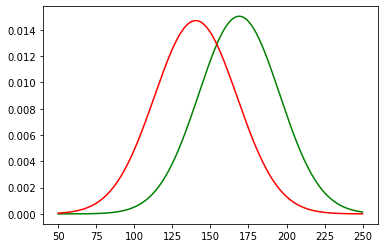

In [28]:
with open('allMatchesBallByBalliccT20.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    allMatchesBallByBall = unpickler.load() 
    file.close()

firstBatWinningRuns,firstBatLosingRuns=[],[]

for match in range(len(allMatchesBallByBall)):
    if allMatchesBallByBall[match]['matchDate'].year>2012:
        continue
    totalRun=0
    for ballInfo in allMatchesBallByBall[match]['innings'][0]:
        ballKey=list(ballInfo.keys())[0]
        totalRun+=ballInfo[ballKey]['runs']['total']
    try:
        if (allMatchesBallByBall[match]['teams'][0]==allMatchesBallByBall[match]['winner']):
            firstBatWinningRuns.append(totalRun)
        else:
            firstBatLosingRuns.append(totalRun)
    except:
        None

mu1,sig1,mu2,sig2=np.mean(firstBatWinningRuns),np.std(firstBatWinningRuns),np.mean(firstBatLosingRuns),np.std(firstBatLosingRuns)
winDistribution= scipy. stats. norm(mu1, sig1)
lossDistribution=scipy. stats. norm(mu2, sig2)

joblib.dump([winDistribution,lossDistribution],'winLossDistribution1stInngs_icct20i.z')

x_values = np. arange(50, 250, 0.1)
plt. plot(x_values, winDistribution. pdf(x_values),color='g')
plt. plot(x_values, lossDistribution. pdf(x_values),color='r')
plt.show()

#def getWinProb(run):
#    return round((winDistribution.pdf(run)/(winDistribution.pdf(run)+lossDistribution.pdf(run)))*100,1)